In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv('/content/airbnb prices.csv')

In [161]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


### Dropping unused columns

In [196]:
df = df.drop(['country','borough'],axis=1)

In [197]:
df = df.drop('minstay',axis=1)

### Types of Room available: Shared, Entire home and Private room


In [162]:
df.room_type.unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

### Removing shared room type as they are very low 

In [163]:
df.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

In [164]:
df = df[df.room_type != "Shared room"]

In [165]:
df.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Name: room_type, dtype: int64

### Popularity of different neighbourhoods

In [166]:
df.neighborhood.value_counts()

De Baarsjes / Oud West                    3280
De Pijp / Rivierenbuurt                   2371
Centrum West                              2217
Centrum Oost                              1724
Westerpark                                1424
Noord-West / Noord-Midden                 1416
Oud Oost                                  1167
Bos en Lommer                              985
Oostelijk Havengebied / Indische Buurt     916
Watergraafsmeer                            515
Oud Noord                                  492
Ijburg / Eiland Zeeburg                    378
Slotervaart                                346
Buitenveldert / Zuidas                     248
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    192
Osdorp                                     161
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             98
Bijlmer Oost                                97
Gaasperdam / 

### No. of records for which reviews are 0 or 1

In [167]:
df.room_id[df['reviews']  == 0].count()

2975

In [168]:
df.room_id[df['reviews']  == 1].count()

1500

### Overall satisfaction by each rating

In [169]:
df['overall_satisfaction'].value_counts()

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

### Sub dataframe where overall satisfaction is 0

In [170]:
zero_satisfaction = df[df['overall_satisfaction'] == 0]

In [171]:
zero_satisfaction

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
38,7468232,1476,7215538,Entire home/apt,NaN,Amsterdam,NaN,Noord-West / Noord-Midden,2,0.0,4,2.0,NaN,594.0,NaN,MuseumSquare apartment with garden,2017-07-23 12:30:27.627216,52.355169,4.883219,0101000020E6100000C4D2C08F6A881340C9C6832D762D...
40,5818567,1476,29561840,Entire home/apt,NaN,Amsterdam,NaN,De Aker / Nieuw Sloten,0,0.0,4,2.0,NaN,361.0,NaN,"Luxurous, modern, bright appartment",2017-07-23 12:29:20.728096,52.346007,4.811830,0101000020E61000008FA50F5D503F1340F29716F5492C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18708,16411584,1476,83673574,Private room,NaN,Amsterdam,NaN,Oostelijk Havengebied / Indische Buurt,0,0.0,1,1.0,NaN,37.0,NaN,Single Room with double bed in Amsterdam east,2017-07-22 16:05:14.190492,52.362315,4.944151,0101000020E61000005AF10D85CFC61340D5EC8156602E...
18709,12886265,1476,50843183,Private room,NaN,Amsterdam,NaN,Noord-West / Noord-Midden,0,0.0,1,1.0,NaN,28.0,NaN,Small room - Amsterdam south,2017-07-22 16:05:14.187572,52.346610,4.846674,0101000020E6100000787E5182FE621340B83B6BB75D2C...
18714,19203256,1476,132265798,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,1,0.0,4,1.0,NaN,35.0,NaN,"NEW Stylish room, Ziggodome, AFAS LIVE, ArenA,...",2017-07-22 16:05:14.168799,52.320049,4.955609,0101000020E6100000950D6B2A8BD213400A0F9A5DF728...
18715,19734178,1476,139135665,Private room,NaN,Amsterdam,NaN,Osdorp,0,0.0,1,0.0,NaN,30.0,NaN,Cozy Apartment in Nieuw-West,2017-07-22 16:05:14.166410,52.356702,4.792346,0101000020E61000003677F4BF5C2B13407A354069A82D...


In [172]:
zero_satisfaction.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,5.721000e+03,5721.0,5.721000e+03,0.0,0.0,5721.000000,5721.0,5721.000000,5721.000000,0.0,5721.000000,0.0,5721.000000,5721.000000
mean,1.472219e+07,1476.0,4.674155e+07,NaN,NaN,0.700926,0.0,3.024821,1.554623,NaN,175.620696,NaN,52.364361,4.889534
std,5.209774e+06,0.0,4.424869e+07,NaN,NaN,0.814133,0.0,1.352056,0.949345,NaN,140.020220,NaN,0.015795,0.036742
min,2.542800e+04,1476.0,2.234000e+03,NaN,NaN,0.000000,0.0,1.000000,0.000000,NaN,22.000000,NaN,52.296200,4.771083
25%,1.150164e+07,1476.0,9.749992e+06,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,114.000000,NaN,52.353951,4.862918
50%,1.643578e+07,1476.0,2.962380e+07,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,150.000000,NaN,52.363567,4.886634
75%,1.917347e+07,1476.0,7.652614e+07,NaN,NaN,1.000000,0.0,4.000000,2.000000,NaN,209.000000,NaN,52.374183,4.909861
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.013075


### Overall satisfaction for different no. of bedrooms

In [173]:
overall_satisfaction = df['overall_satisfaction'].groupby(by=df['bedrooms'])
overall_satisfaction.sum()

bedrooms
0.0      3828.5
1.0     38191.5
2.0     14165.5
3.0      3880.0
4.0      1251.0
5.0       223.5
6.0        65.5
7.0         9.5
8.0         9.0
9.0         5.0
10.0       19.5
Name: overall_satisfaction, dtype: float64

### Overall satisfaction where price greater than equal to 150 and less than 180

In [174]:
df.overall_satisfaction[df['price'].between(150,179, inclusive=True)].count()

2805

### To see where is the most availability in terms of accomodates

In [175]:
df['accommodates'].value_counts()

2     9996
4     5563
3     1583
6      475
5      470
1      355
8      105
7       52
16      18
10      16
12       9
9        8
14       6
11       2
13       1
17       1
Name: accommodates, dtype: int64

### To see at what price most properties are available

In [176]:
df['price'].describe()

count    18660.000000
mean       166.811897
std        108.961385
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64

#### Only 23 records have price greater than 1000

In [177]:
df.price[df['price'].between(1000,6000, inclusive=True)].count()

23

### Proportion of each bedroom value

In [178]:
df_bedroom = df['bedrooms']
df_count = df_bedroom.groupby([df['bedrooms']]).count()
df_sum = df_count.sum()
df_groups = df_count.apply(lambda x: 100*x/df_sum)
df_groups

bedrooms
0.0      6.184352
1.0     59.153269
2.0     23.879957
3.0      7.738478
4.0      2.534834
5.0      0.332262
6.0      0.101822
7.0      0.021436
8.0      0.016077
9.0      0.010718
10.0     0.026795
Name: bedrooms, dtype: float64

### Dropping all 0 bedroom records

In [179]:
df = df[df['bedrooms']!=0]

### Histogram showing no.of apartments having 0-100 reviews

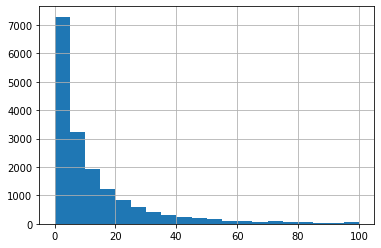

In [180]:
df['reviews'].hist(bins=20, range = [0,100])

### Histogram showing no.of apartments having 0-1000 reviews

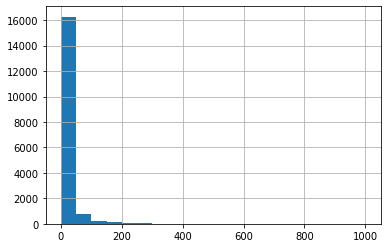

In [181]:
df['reviews'].hist(bins=20, range = [0,1000])

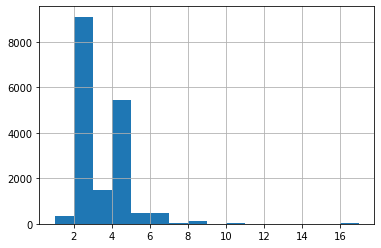

In [182]:
df['accommodates'].hist(bins=16)

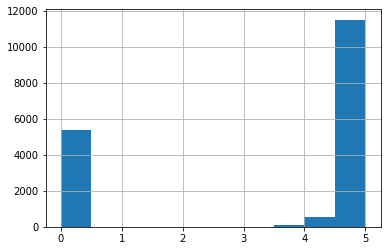

In [183]:
df['overall_satisfaction'].hist()

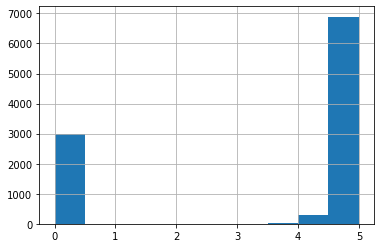

In [184]:
df_price1 = df[df['price'].between(100,200,inclusive=True)]
df_price1['overall_satisfaction'].hist()

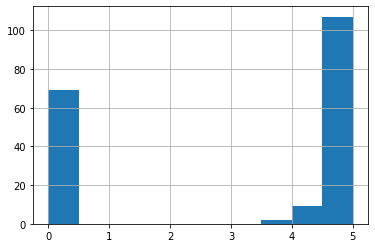

In [185]:
df_price2 = df[df['price']<50]
df_price2['overall_satisfaction'].hist()

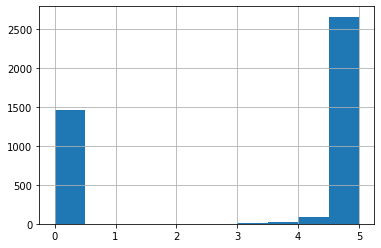

In [186]:
df_price3 = df[df['price']>200]
df_price3['overall_satisfaction'].hist()

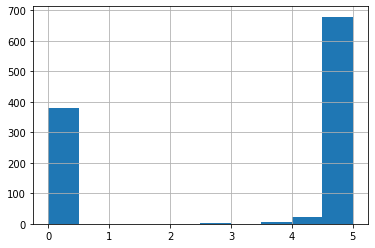

In [187]:
df_price4 = df[df['price']>300]
df_price4['overall_satisfaction'].hist()

### Relation between Price and Reviews

In [188]:
price_reviews_corr = df['price'].corr(df['reviews'])
price_reviews_corr

-0.08376509499293573

### Relation between Accomodates and Price

In [189]:
acc_price_corr = df['accommodates'].corr(df['price'])
acc_price_corr

0.5020703820281404

### Relation between Overall Satisfaction and Price

In [190]:
satisfaction_price_corr = df['overall_satisfaction'].corr(df['price'])
satisfaction_price_corr

-0.04664160003911666

### Relation between Bedrooms and Price

In [191]:
bedrooms_price_corr = df['bedrooms'].corr(df['price']) 
bedrooms_price_corr

0.4587740137423908

### Availability based on neighbourhood

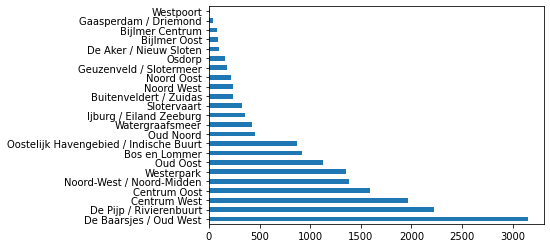

In [192]:
df['neighborhood'].value_counts().plot(kind='barh')

In [193]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
